In [2]:
# Use t-SNE to visualize the forground and background features of the images.

# Set the root path of the dataset to be data/images/CUB_200_2011/images
# Set the root path of the dataset to be data/images/ILSVRC2012
ROOT_CUB = '/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/data/images/CUB_200_2011/images'
ROOT_ILSVRC = '/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/data/images/ILSVRC2012'

# Read and load all the images in the Black Footed Albatross folder and print the number of images
# in the folder, as well as the first image name.
# The images are loaded as PIL images.
from PIL import Image
# if pillow is not installed, use pip install pillow
# run the following code in the terminal
# pip install pillow
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [13]:


# Set the path of the Black Footed Albatross folder
albatros_path = os.path.join(ROOT_CUB, '001.Black_footed_Albatross')

# Get the list of all the images
albatros_list = os.listdir(albatros_path)

# Use pillow.Image to load all the images into a list of albatros_images
albatros_images = [Image.open(os.path.join(albatros_path, img)) for img in albatros_list]

def load_images(root_folder):
    # Load all the images in CUB_200_2011/images/ with the labels as the folder names
    # and store them in a list of images
    cub_images = []
    cub_labels = []

    # Iterate through all the folders in the CUB_200_2011/images/ folder
    for folder in os.listdir(root_folder):
        # Get the path of the folder
        folder_path = os.path.join(root_folder, folder)
        # Get the list of all the images in the folder
        image_list = os.listdir(folder_path)
        # Iterate through all the images in the folder
        for img in image_list:
            # Get the path of the image
            img_path = os.path.join(folder_path, img)
            # Load the image and append it to the list of images
            cub_images.append(Image.open(img_path))
            # Append the label
            cub_labels.append(folder)

    return cub_images, cub_labels

# Load all the images in CUB_200_2011/images/ with the labels as the folder names
# and store them in a list of images
cub_images, cub_labels = load_images(ROOT_CUB)


# Print the number of images in the Black Footed Albatross folder
print('Number of images in Black Footed Albatross folder:', len(albatros_list))

# Print the first image name
print('First image name In Albatros:', albatros_list[0])

# Print the number of images in the CUB_200_2011/images/ folder
print('Number of images in CUB_200_2011/images/ folder:', len(cub_images))

# Print the first image name
print('First image name in Cub Images:', cub_images[0])

# Print the number of labels in the CUB_200_2011/images/ folder
print('Number of labels in CUB_200_2011/images/ folder:', len(cub_labels))

# Print the first label
print('First label in Cub Images:', cub_labels[0])



Number of images in Black Footed Albatross folder: 60
First image name In Albatros: Black_Footed_Albatross_0076_417.jpg
Number of images in CUB_200_2011/images/ folder: 11788
First image name in Cub Images: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x357 at 0x7F536B85B220>
Number of labels in CUB_200_2011/images/ folder: 11788
First label in Cub Images: 175.Pine_Warbler


In [14]:
# Clear teh memory cache to run the code faster
import gc
gc.collect()


0

In [6]:
# IMport dataloader from torch
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm

# Define a transform to convert the PIL images to tensors
transform = transforms.ToTensor()

# Define a function to load the images and apply the transform
def load_images_with_transform(root_folder, transform):
    # Load all the images in CUB_200_2011/images/ with the labels as the folder names
    # and store them in a list of images
    cub_images_transform = []
    cub_labels_transform = []

    # Create a coutner to count the number of images loaded and limit the number of images to be loaded to 120
    counter = 0
    
    # Iterate through all the folders in the CUB_200_2011/images/ folder
    # and load the images and apply the transform. use tqdm to show the progress bar
    for folder in tqdm(os.listdir(root_folder)):
        # Get the path of the folder
        folder_path = os.path.join(root_folder, folder)
        # Get the list of all the images in the folder
        image_list = os.listdir(folder_path)
        # Iterate through all the images in the folder
        for img in image_list:
            # Get the path of the image
            img_path = os.path.join(folder_path, img)
            # Load the image and apply the transform
            cub_images_transform.append(transform(Image.open(img_path)))
            # Append the label
            cub_labels_transform.append(folder)

        # Increment the counter
        counter += 1
        # Break the loop if the counter is 120
        if counter == 120:
            break


    return cub_images_transform, cub_labels_transform
    

cub_images_transform, cub_labels_transform = load_images_with_transform(ROOT_CUB, transform)

 60%|█████▉    | 119/200 [00:24<00:16,  4.80it/s]


In [7]:
# Create a dataset from the list of images and labels
dataset = list(zip(cub_images_transform, cub_labels_transform))

# Create a dataloader
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

# Import torch
import torch

# Define a function to visualize the images
def show_images(images, labels, ncols=4):
    # Create a figure with the given number of columns
    fig, axes = plt.subplots(figsize=(12, 12), ncols=ncols)

    # Iterate through the images and labels
    for i, (image, label) in enumerate(zip(images, labels)):
        # Get the corresponding axis
        ax = axes[i % ncols]
        # Plot the image on the axis
        ax.imshow(image)
        # Set the title of the image as the label
        ax.set_title(label)
        # Remove the ticks
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

print(f"Type of the loaded dataloader: {type(dataloader)}")

Type of the loaded dataloader: <class 'torch.utils.data.dataloader.DataLoader'>


In [11]:
"next" in dir(dataloader)

False

In [9]:

# Get the first batch of images and labels
images, labels = next(iter(dataloader))

# Show the images and labels
show_images(images, labels)


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/venv/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/venv/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 119, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/home/billymicoder/Documents/GitHub/BillyCCAM/CCAM/venv/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 162, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [3, 332, 500] at entry 0 and [3, 396, 500] at entry 1


In [ ]:
# Import torch.nn
import torch.nn as nn

# Define a class for the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)

        # Define the pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Define the linear layers
        self.fc1 = nn.Linear(32 * 56 * 56, 1024)
        self.fc2 = nn.Linear(1024, 200)

        # Define the dropout layer
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # Pass the input tensor through the convolutional layers
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))

        # Flatten the input tensor
        x = x.view(-1, 32 * 56 * 56)

        # Pass the tensor through the linear layers
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x
    
# Create an instance of the model
model = CNN()

# Print the model architecture
print(model)

# Import torch.optim
import torch.optim as optim

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Import tqdm
from tqdm import tqdm

# Define the number of epochs to train for
n_epochs = 10

# Move the model to the GPU
model.cuda()

# Set the model to train mode
model.train()

# Define a dictionary to store the training statistics
training_stats = {'epoch': [], 'Training Loss': [], 'Training Acc': []}


In [ ]:
# Use t-SNE to visualise the features
from sklearn.manifold import TSNE

# Define a function to visualise the features
def visualize_features(features, labels):
    # Create a TSNE instance
    tsne = TSNE(n_components=2, random_state=0)

    # Use TSNE to get the reduced dimensionality features
    reduced_features = tsne.fit_transform(features)

    # Define a list of markers
    markers = ['o', 'x', 's', '*', '+']

    # Get the unique labels
    unique_labels = np.unique(labels)

    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Iterate through the unique labels
    for i, label in enumerate(unique_labels):
        # Get the indices where the label is equal to i
        indices = np.where(labels == i)
        # Scatter plot the points with reduced dimensions
        ax.scatter(reduced_features[indices, 0], reduced_features[indices, 1], marker=markers[i], label=label)

    # Add a legend
    ax.legend()

    plt.show()

In [ ]:
# Define a function to train the model
def train(model, criterion, optimizer, dataloader, n_epochs=10):
    # Move the model to the GPU
    model.cuda()

    # Set the model to train mode
    model.train()

    # Define a dictionary to store the training statistics
    training_stats = {'epoch': [], 'Training Loss': [], 'Training Acc': []}

    # Iterate through the epochs
    for epoch in range(n_epochs):
        # Print the epoch number
        print('Epoch:', epoch + 1)

        # Keep track of the training loss
        train_loss = 0.0

        # Keep track of the number of correct predictions
        num_correct = 0

        # Keep track of the number of data points
        num_data = 0

        # Iterate through the training data
        for data, target in tqdm(dataloader):
            # Move the data to the GPU
            data = data.cuda()
            target = target.cuda()

            # Clear the gradients
            optimizer.zero_grad()

            # Pass the data through the model
            output = model(data)

            # Calculate the loss
            loss = criterion(output, target)

            # Backpropagation
            loss.backward()

            # Update the weights
            optimizer.step()

            # Update the training loss
            train_loss += loss.item() * data.size(0)

            # Get the predicted class with the highest score
            pred = output.argmax(dim=1, keepdim=True)

            # Get the number of correct predictions
            num_correct += pred.eq(target.view_as(pred)).sum().item()

            # Update the total number of data points
            num_data += data.size(0)

        # Calculate the training accuracy
        train_acc = num_correct / num_data

        # Print the training loss and accuracy
        print('Training Loss:', train_loss / num_data)
        print('Training Accuracy:', train_acc)

        # Add the training loss and accuracy to the dictionary
        training_stats['epoch'].append(epoch + 1)
        training_stats['Training Loss'].append(train_loss / num_data)
        training_stats['Training Acc'].append(train_acc)

    # Return the training statistics
    return training_stats

# Train the model
training_stats = train(model, criterion, optimizer, dataloader, n_epochs)

# Plot the training loss
plt.plot(training_stats['epoch'], training_stats['Training Loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.plot(training_stats['epoch'], training_stats['Training Acc'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Set the model to evaluation mode
model.eval()

In [ ]:
# Define a function to get the features from a pre-trained model
def get_features(model, dataloader):
    # Create a list to store the features and the labels
    features = []
    labels = []

    # Iterate through the dataloader
    for data, target in tqdm(dataloader):
        # Move the data to the GPU
        data = data.cuda()
        target = target.cuda()

        # Pass the data through the model
        output = model(data)

        # Get the features and the labels
        features.extend(output.cpu().detach().numpy())
        labels.extend(target.cpu().detach().numpy())

    # Return the features and the labels
    return features, labels

# Get the features from the pre-trained model
features, labels = get_features(model, dataloader)

# visualise the features
visualize_features(features, labels)

In [2]:
from WSOL.models.resnet import ResNet, resnet101, resnet50
import torch
import random

# Set the seed for reproducible results
seed = 10
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

# Set the device to be cuda if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the pretrained ResNet50 model
model = resnet50(pretrained=True)
# model.eval()

if torch.cuda.is_available():
    model = model.cuda()




In [4]:
# detach the images from the graph and move them to the device
# cub_images = [img.detach().to(device) for img in cub_images]
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 100073 KiB | 100073 KiB | 100073 KiB |      0 B   |
|       from large pool |  82240 KiB |  82240 KiB |  82240 KiB |      0 B   |
|       from small pool |  17833 KiB |  17833 KiB |  17833 KiB |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         | 100073 KiB | 100073 KiB | 100073 KiB |      0 B   |
|       from large pool |  82240 KiB |  82240 KiB |  82240 KiB |

In [3]:
# !pip install tqdm
from tqdm import tqdm
from torchvision import transforms

# Define a function to extract the features of the images
def extract_features(model, images):
    '''
    Extract the features of the images using the pretrained ResNet50 model.
    The features are extracted from the last convolutional layer.
    '''
    # Set the model to evaluation mode
    model.eval()

    # Define a list to store the features
    features = []

    # Iterate over all the images
    for img in tqdm(images):
        # Convert the image to a torch.Tensor and normalize the image
        # The image size should be (3, 224, 224)
        img = transforms.ToTensor()(img)
        img = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])(img)
        
        # Add a batch dimension to the image
        # The image size should be (1, 3, 224, 224)
        img = img.unsqueeze(0)

        
        # Move the image to the device
        img = img.to(device)

        # Extract the features
        # The feature size should be (1, 2048, 7, 7)
        # inputs, labels = inputs.to(device), labels.to(device)
        feature = model(img)

        # Remove the batch dimension and append the feature to the list
        # The feature size should be (2048, 7, 7)
        features.append(feature.squeeze(0))

    return features

# Extract the features of the images
# albatros_features = extract_features(model, albatros_images)
cub_images_features = extract_features(model, cub_images)

  0%|          | 56/11788 [00:39<2:18:02,  1.42it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 12.00 MiB (GPU 0; 6.00 GiB total capacity; 19.09 GiB already allocated; 0 bytes free; 19.27 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [17]:
# Print the number of features extracted
print('Number of feature maps:', len(albatros_features))

# Print the shape of the first feature map
print('Shape of the first feature map:', albatros_features[0].shape)

# Print the shape of the last feature map
print('Shape of the last feature map:', albatros_features[-1].shape)

# Print the number of parameters of the model
print('Number of parameters:', sum(p.numel() for p in model.parameters()))

# Print the number of trainable parameters of the model
print('Number of trainable parameters:', sum(p.numel() for p in model.parameters() if p.requires_grad))

Number of feature maps: 60
Shape of the first feature map: torch.Size([1000])
Shape of the last feature map: torch.Size([1000])
Number of parameters: 25557032
Number of trainable parameters: 25557032


In [29]:
print(f"Type of Albatros features: {type(albatros_features)}")

# Convert the list of features to a torch.Tensor
albatros_features_tensor = torch.stack(albatros_features)

# Print the shape of the tensor
print('Shape of the tensor:', albatros_features_tensor.shape)

# Print the type of the tensor
print('Type of the tensor:', albatros_features_tensor.dtype)

# Get the labels of the images
albatros_labels_numpy = np.array([0 for _ in range(len(albatros_images))])
print('Shape of the labels:', albatros_labels_numpy.shape)
print('Type of the labels:', albatros_labels_numpy.dtype)

Type of Albatros features: <class 'list'>
Shape of the tensor: torch.Size([60, 1000])
Type of the tensor: torch.float32
Shape of the labels: (60,)
Type of the labels: int64


In [22]:
'cpu' in dir(albatros_features_tensor)

True

/tmp/ipykernel_20468/2562659186.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(x_embedded[:, 0], x_embedded[:, 1], label=c, cmap=cmap)


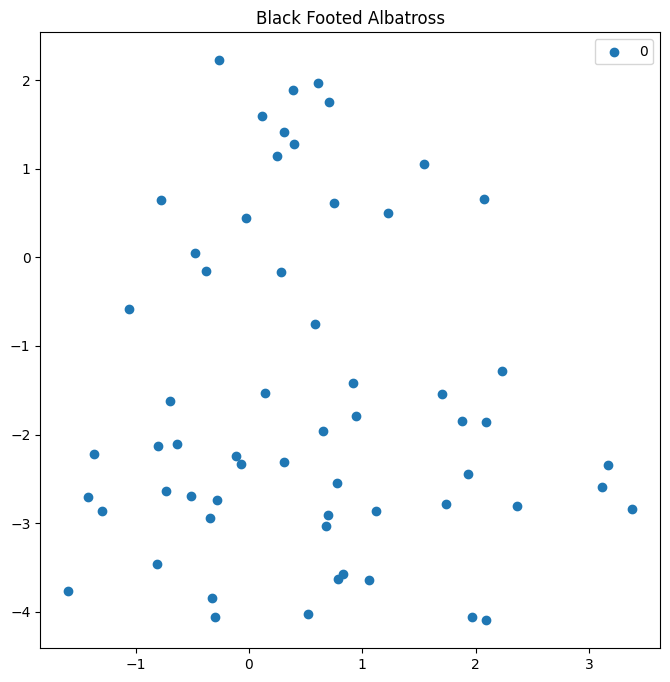

In [31]:
# import tsne and matplotlib
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define a function to visualize the features
def visualize_features(features, labels, num_classes, title):
    '''
    Visualize the features using t-SNE.
    '''
    # Get the color map
    cmap = plt.get_cmap('tab20')

    # Define the figure
    figure = plt.figure(figsize=(8, 8))
    axes = plt.axes()

    # Get the list of all the classes
    classes = [i for i in range(num_classes)]

    # Iterate over all the classes
    for i, c in enumerate(classes):
        # Get the indexes of the images of the current class
        indexes = np.where(labels == c)[0]

        # Extract the features of the images of the current class
        x = [features[index] for index in indexes]

        # convert the features to a numpy array
        x = np.array(x)

        # Apply t-SNE to the features
        x_embedded = TSNE(n_components=2).fit_transform(x)

        # Scatter plot the points
        axes.scatter(x_embedded[:, 0], x_embedded[:, 1], label=c, cmap=cmap)

    # Set the title
    axes.set_title(title)

    # Set the legend
    axes.legend(loc='best')

    # Show the plot
    plt.show()

# Convert the list of features to a numpy array
# albatros_features_numpy = np.array(albatros_features_tensor.cpu().detach())
albatros_features_numpy = albatros_features_tensor.cpu().detach().numpy()

# # Convert the list of images to a numpy array
# albatros_images_numpy = np.array(albatros_images)

# # Get the labels of the images
# albatros_labels_numpy = np.array([0 for _ in range(len(albatros_images))])

# Visualize the features
visualize_features(albatros_features_numpy, albatros_labels_numpy, 1, 'Black Footed Albatross')

In [ ]:
import cv2

# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
 
# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]
 
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

# Compute the coordinates of the image on the plot
def compute_plot_coordinates(image, x, y, image_centers_area_size, offset):
    image_height, image_width, _ = image.shape
 
    # compute the image center coordinates on the plot
    center_x = int(image_centers_area_size * x) + offset
 
    # in matplotlib, the y axis is directed upward
    # to have the same here, we need to mirror the y coordinate
    center_y = int(image_centers_area_size * (1 - y)) + offset
 
    # knowing the image center,
    # compute the coordinates of the top left and bottom right corner
    tl_x = center_x - int(image_width / 2)
    tl_y = center_y - int(image_height / 2)
 
    br_x = tl_x + image_width
    br_y = tl_y + image_height
 
    return tl_x, tl_y, br_x, br_y
 
# we'll put the image centers in the central area of the plot
# and use offsets to make sure the images fit the plot
 
# init the plot as white canvas
tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)
 
# now we'll put a small copy of every image to its corresponding T-SNE coordinate
for image_path, label, x, y in tqdm(
        zip(albatros_labels_numpy, albatros_labels_numpy, tx, ty),
        desc='Building the T-SNE plot',
        total=len(images)
):
    image = cv2.imread(image_path)
 
    # scale the image to put it to the plot
    image = scale_image(image, max_image_size)
 
    # draw a rectangle with a color corresponding to the image class
    image = draw_rectangle_by_class(image, label)
 
    # compute the coordinates of the image on the scaled plot visualization
    tl_x, tl_y, br_x, br_y = compute_plot_coordinates(image, x, y, image_centers_area_size, offset)
 
    # put the image to its t-SNE coordinates using numpy sub-array indices
    tsne_plot[tl_y:br_y, tl_x:br_x, :] = image
 
cv2.imshow('t-SNE', tsne_plot)
cv2.waitKey()